In [2]:
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [3]:
from pycaret import show_versions
show_versions()


System:
    python: 3.9.21 (main, Dec  4 2024, 08:53:34)  [GCC 13.2.0]
executable: /home/env-uno/bin/python
   machine: Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39

PyCaret required dependencies:
                 pip: 24.3.1
          setuptools: 75.6.0
             pycaret: 3.3.2
             IPython: 8.18.1
          ipywidgets: 8.1.5
                tqdm: 4.67.1
               numpy: 1.26.4
              pandas: 2.1.4
              jinja2: 3.1.5
               scipy: 1.11.4
              joblib: 1.3.2
             sklearn: 1.4.2
                pyod: 2.0.3
            imblearn: 0.12.4
   category_encoders: 2.6.4
            lightgbm: 4.5.0
               numba: 0.60.0
            requests: 2.32.3
          matplotlib: 3.7.5
          scikitplot: 0.3.7
         yellowbrick: 1.5
              plotly: 5.24.1
    plotly-resampler: Not installed
             kaleido: 0.2.1
           schemdraw: 0.15
         statsmodels: 0.14.4
              sktime: 0.26.0
           

In [4]:
import numpy as np
import pandas as pd
from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

global_fig_settings = {
    "renderer":"png",
    "width":1000,
    "height":600,
}

In [5]:
data = get_data("airquality")

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [7]:
data.insert(0, "datetime", pd.to_datetime(data["Date"] + " " + data["Time"]))
data.drop(columns = ["Date", "Time"], inplace=True)
data.head()

,datetime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [8]:
target = "CO(GT)"

In [9]:
data[data[target] == -200].head()

,datetime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
10,2004-03-11 04:00:00,-200.0,1011,14,1.3,527,21,1818,34,1197,445,10.1,60.5,0.7465
34,2004-03-12 04:00:00,-200.0,831,10,1.1,506,21,1893,32,1134,384,6.1,65.9,0.6248
39,2004-03-12 09:00:00,-200.0,1545,-200,22.1,1353,-200,767,-200,2058,1588,9.2,56.2,0.6561
58,2004-03-13 04:00:00,-200.0,1147,56,6.2,821,109,1132,83,1412,992,7.0,71.1,0.7158
82,2004-03-14 04:00:00,-200.0,1130,56,5.2,773,70,1130,82,1452,1051,12.1,61.1,0.8603


In [10]:
data.replace(-200, np.nan, inplace=True)
data[data[target] == -200]

,datetime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH


In [11]:
eda = TSForecastingExperiment()
_ = eda.setup(
    data = data,
    target = target,
    index = "datetime",
    fh = 48, # forcast horizon 예측할 미래 기갠
    numeric_imputation_target="drift",
    numeric_imputation_exogenous="drift",
    fig_kwargs=global_fig_settings, # 플롯에 대한 기본 설정 지정
    session_id = 42,   
)

,Description,Value
0,session_id,42
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(9357, 13)"
5,Transformed data shape,"(9357, 13)"
6,Transformed train set shape,"(9309, 13)"
7,Transformed test set shape,"(48, 13)"
8,Rows with missing values,91.2%
9,Fold Generator,ExpandingWindowSplitter


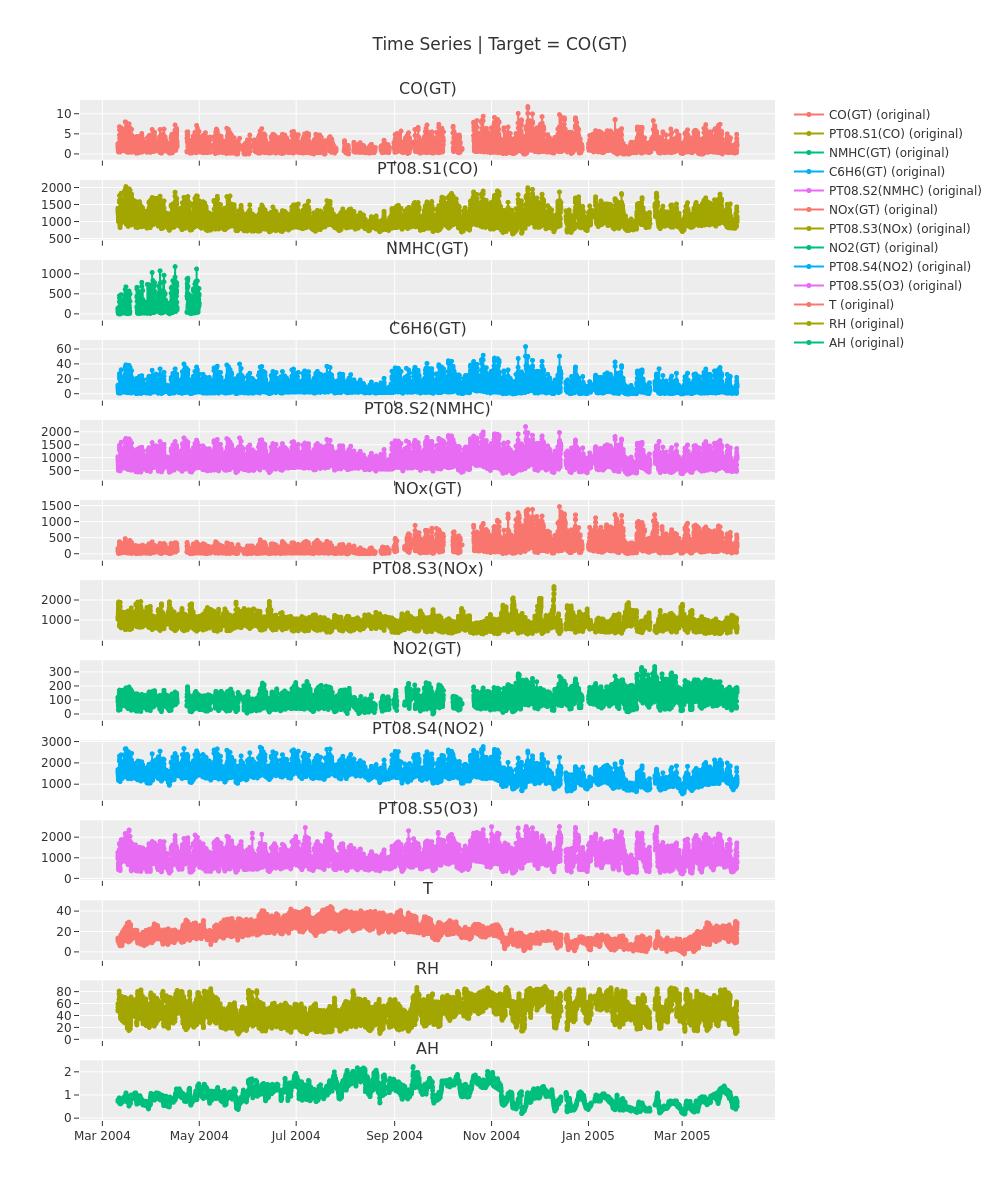

In [12]:
eda.plot_model(
    fig_kwargs={
        "renderer": "png",
        "width"   : 1000,
        "height"  : 1200,
    }
)

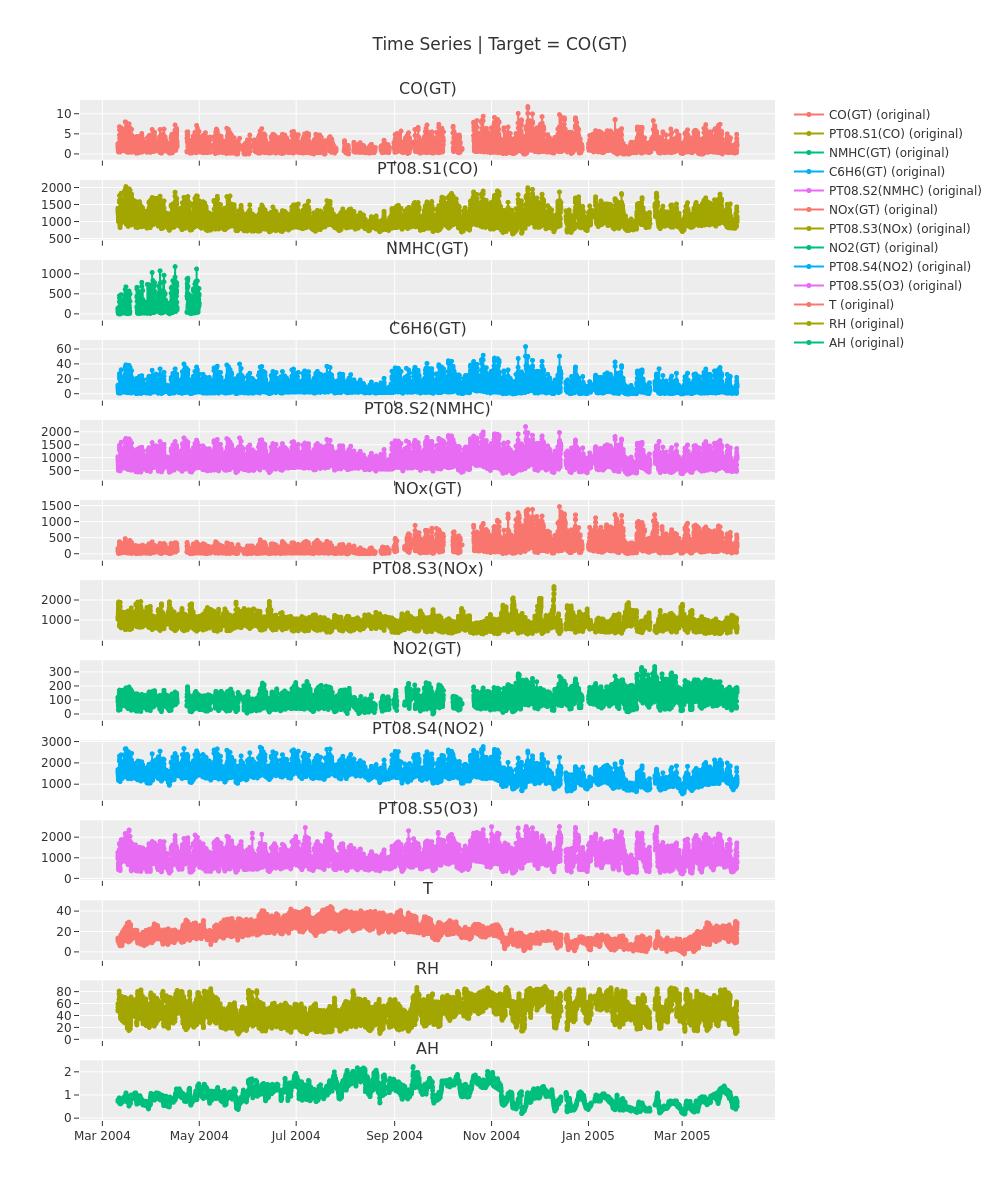

In [13]:
# 시계열 데이터 시각화 with 세부설정
eda.plot_model(
    plot="ts",
    fig_kwargs={
        "height": 1200,
        # resampler_kwargs를 사용하여, plotly-resampler 객체의 생성자를 구성할 수 있습니다.
        "resampler_kwargs": {
            "default_n_shown_samples": 1500,
            # show_dash kwargs는 show_dash (render) 메서드의 kwargs를 보류합니다.
            "show_dash": {"mode": "inline", "port": 8055},
        },
    },
    # display_format='plotly-dash', # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
    # display_format="plotly-widget",  # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
)

In [14]:
# 결측치가 많아 제거합니다.
exclude = ["NMHC(GT)"]

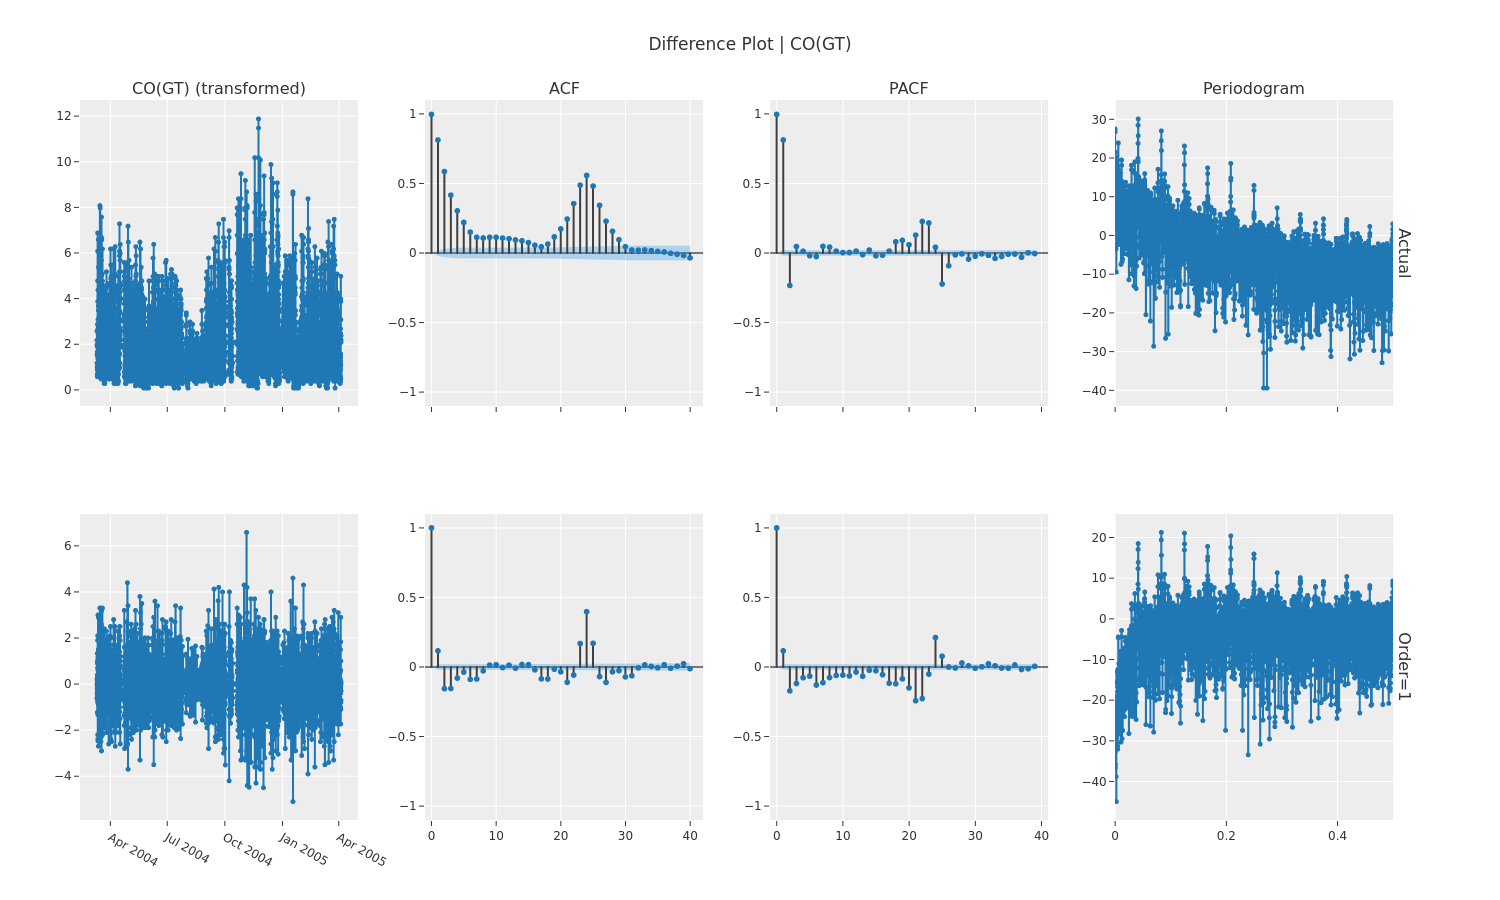

In [15]:
# 기본적으로 원본 데이터를 첫 번째 차분(order d = 1)과 함께 그래프로 그립니다.
eda.plot_model(
    plot="diff",
    fig_kwargs={
        "width": 1500,
        "height": 900,
        # plotly-widget을 사용할 때는 show_dash kwargs를 전달할 필요가 없습니다.
        "resampler_kwargs": {"default_n_shown_samples": 1500},
    },
    data_kwargs={"acf": True, "pacf": True, "periodogram": True},
    # display_format='plotly-dash', # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
    # display_format='plotly-widget', # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
)

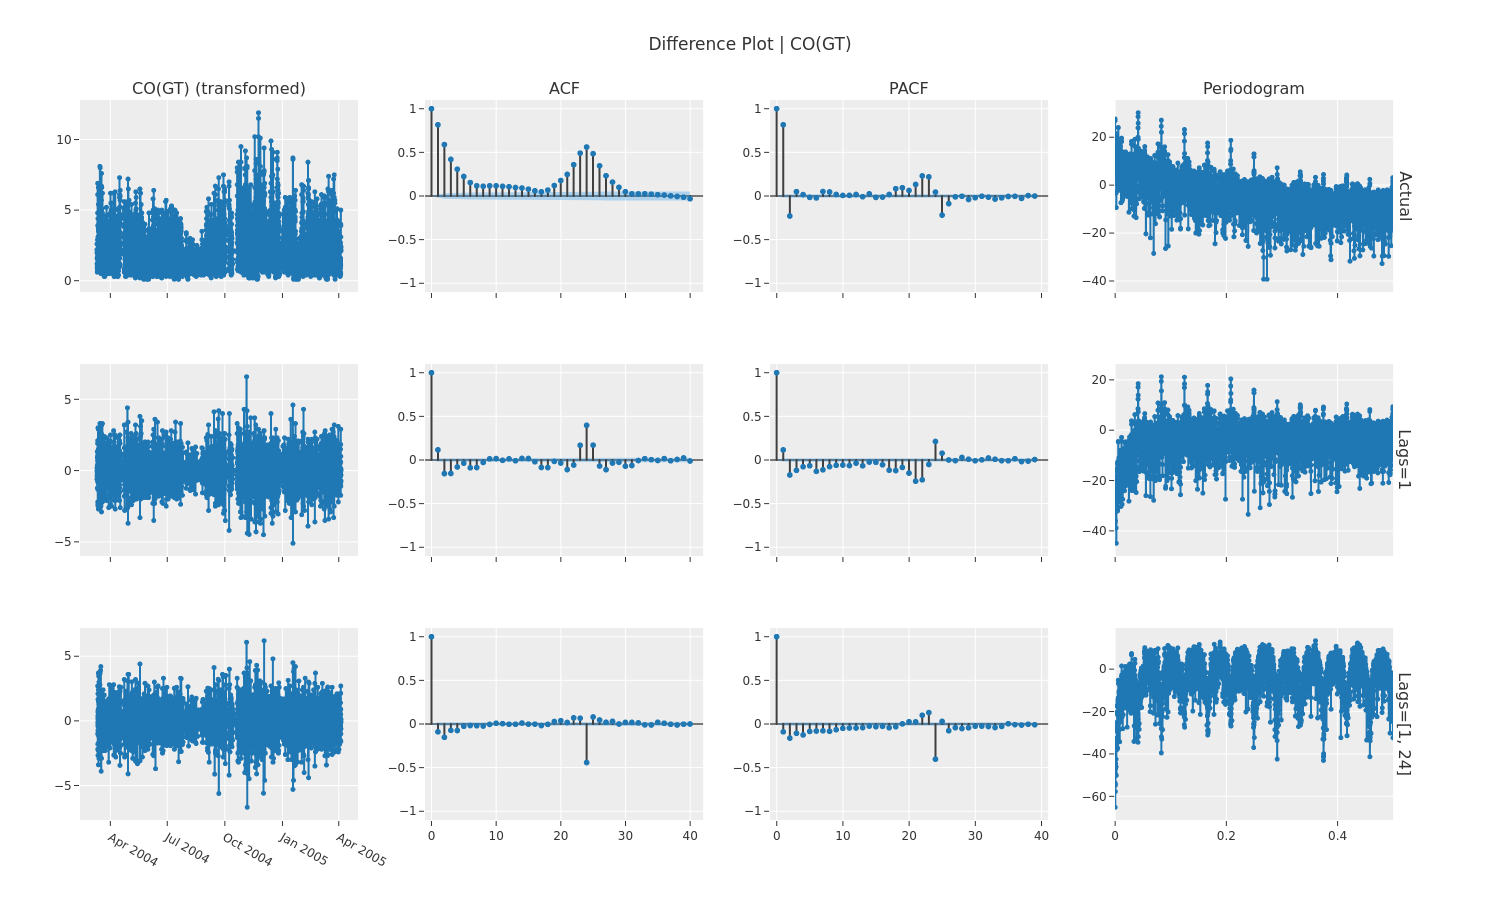

In [16]:
# 차분에 대한 시각화
eda.plot_model(
    plot="diff",
    fig_kwargs={
        "width": 1500,
        "height": 900,
        "resampler_kwargs": {
            "default_n_shown_samples": 1500,
            "show_dash": {"mode": "inline", "port": 8056},
        },
    },
    data_kwargs={
        "lags_list": [1, [1, 24]],
        "acf": True,
        "pacf": True,
        "periodogram": True,
    },
    # display_format='plotly-dash',    # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
    # display_format="plotly-widget",  # interactive 시각화 출력을 원한다면 주석을 해제 합니다.
)

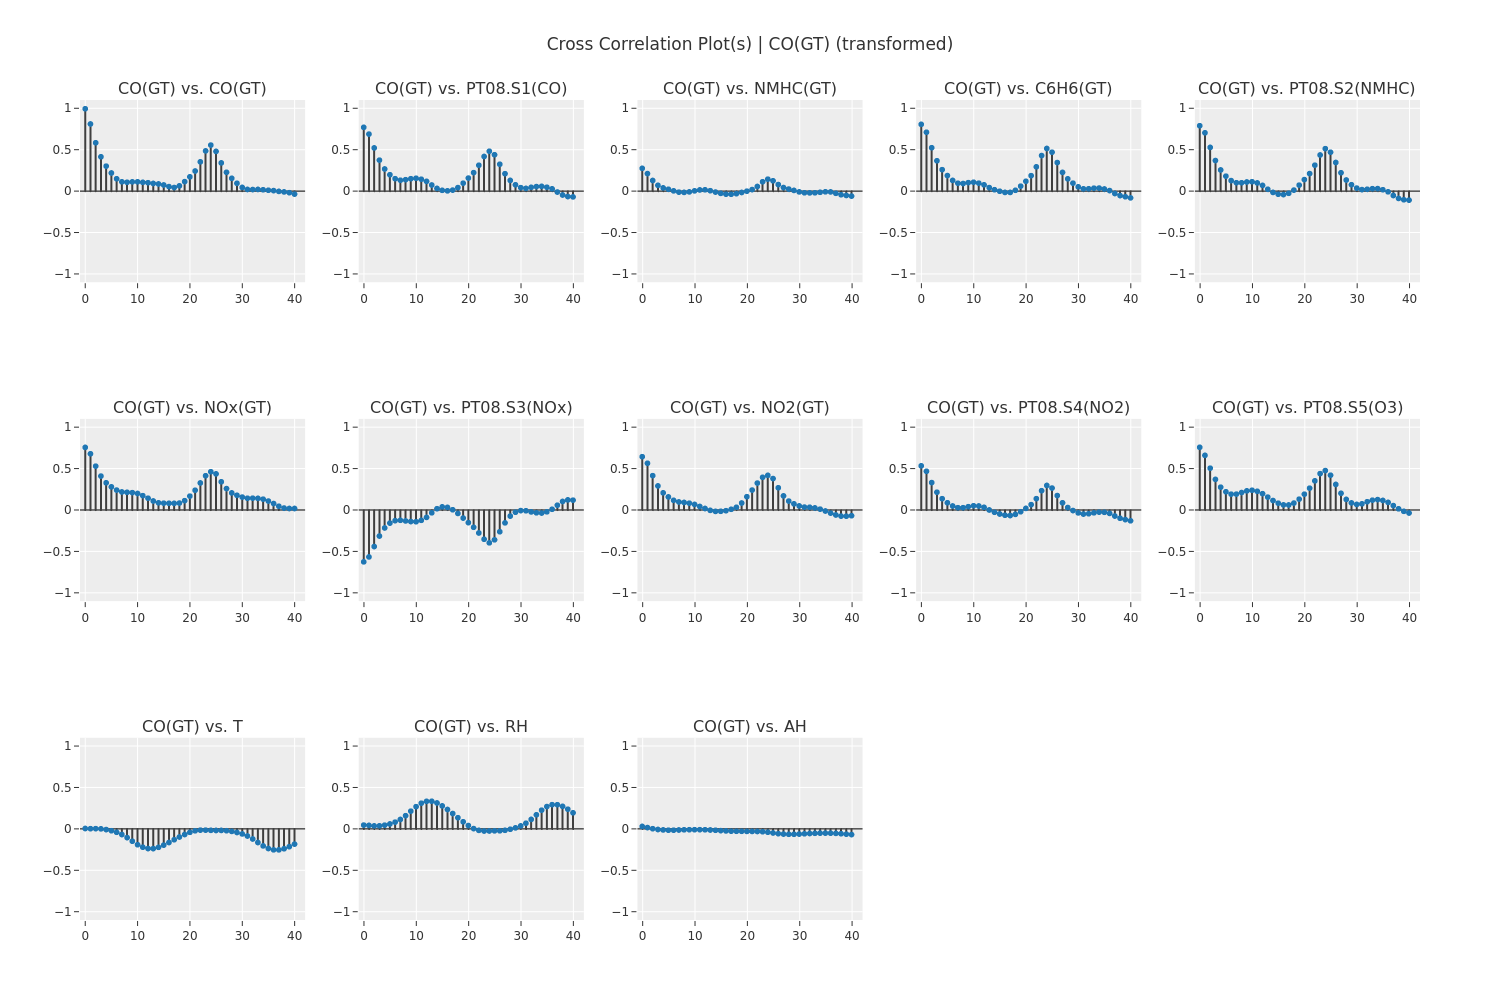

In [17]:
# Cross Correlation Plot 시각화
eda.plot_model(plot="ccf", fig_kwargs={"height": 1000, "width": 1500})

In [18]:
# AH 컬럼 제외목록에 추가
exclude.append("AH")
exclude

['NMHC(GT)', 'AH']

In [19]:
data.drop(columns = exclude, inplace=True)
data.head()

,datetime,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


In [20]:
# 시계열 실험(Experiment) 객체를 생성합니다.
exp_uni = TSForecastingExperiment()

# 설정 값 지정
exp_uni.setup(
    data=data[target],
    fh=48,  # (예측 time-step) forecast horizon 설정
    numeric_imputation_target="linear",
    numeric_imputation_exogenous="linear",
    fig_kwargs=global_fig_settings,
    session_id=42,
)

,Description,Value
0,session_id,42
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(9357, 1)"
5,Transformed data shape,"(9357, 1)"
6,Transformed train set shape,"(9309, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,18.0%
9,Fold Generator,ExpandingWindowSplitter


In [21]:
# 'arima' 모델을 생성합니다.
model = exp_uni.create_model(
    "arima",  # ARIMA, SARIMA, SARIMAX 등을 커버. 모두 동일하게 arima 로 지정
    order=(0, 1, 0),  # (p, d, q)
    seasonal_order=(0, 1, 0, 24),  # (p, d, q, s)
)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,9164.0000,1.1705,1.1515,1.0340,1.4835,0.5751,0.9044,-1.3625
1,9212.0000,2.1365,1.6565,1.8839,2.1316,1.5146,0.7456,-2.8068
2,9260.0000,1.0963,0.8704,0.9652,1.1183,1.1796,1.2402,-5.1530
Mean,nan,1.4677,1.2261,1.2944,1.5778,1.0898,0.9634,-3.1074
SD,nan,0.4738,0.3252,0.4178,0.4190,0.3888,0.2062,1.5620


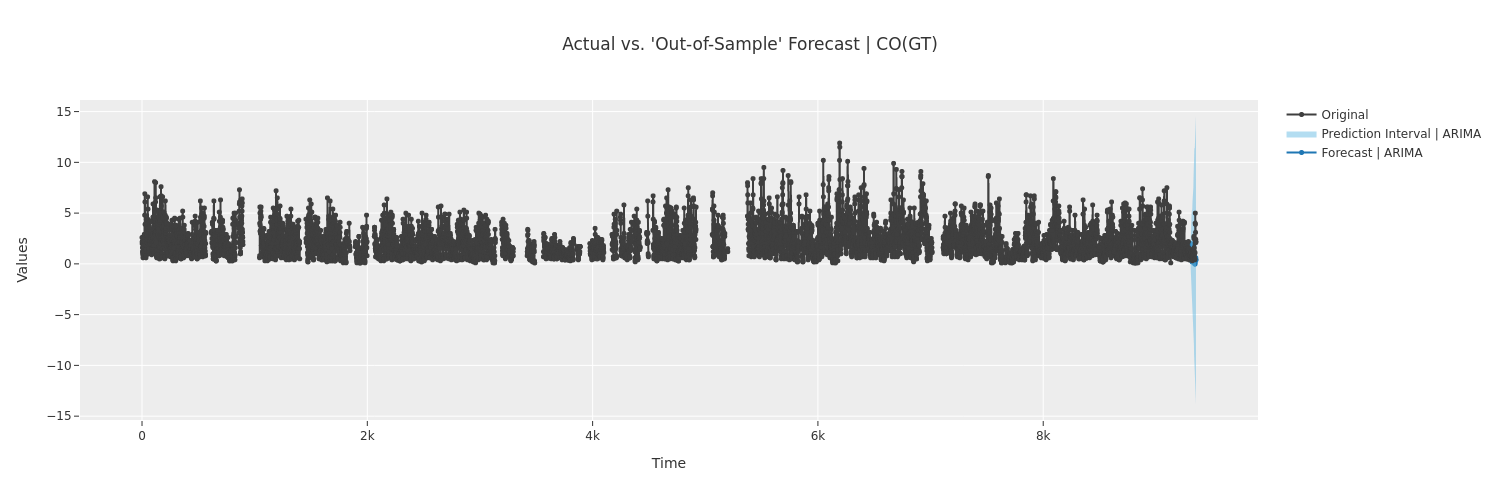

In [22]:
exp_uni.plot_model(
    model,
    fig_kwargs={
        # 'notebook' 으로 설정시 interactive 플롯을 생성합니다.
        "renderer": "png",
        "width": 1500,
        "height": 500,
    },
)

In [23]:
# 외생변수를 추가한 실험 생성
exp_exo = TSForecastingExperiment()

# setup 시 외생변수를 포함한 dataframe 을 입력
exp_exo.setup(
    data=data,
    target=target,
    index="datetime",
    fh=48,
    numeric_imputation_target="linear",
    numeric_imputation_exogenous="drift",
    fig_kwargs=global_fig_settings,
    session_id=42,
)

,Description,Value
0,session_id,42
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(9357, 11)"
5,Transformed data shape,"(9357, 11)"
6,Transformed train set shape,"(9309, 11)"
7,Transformed test set shape,"(48, 11)"
8,Rows with missing values,25.8%
9,Fold Generator,ExpandingWindowSplitter


In [24]:
# SARIMAX 모델 생성
model_exo = exp_exo.create_model(
    "arima",
    order=(0, 1, 0),
    seasonal_order=(0, 1, 0, 24),
)

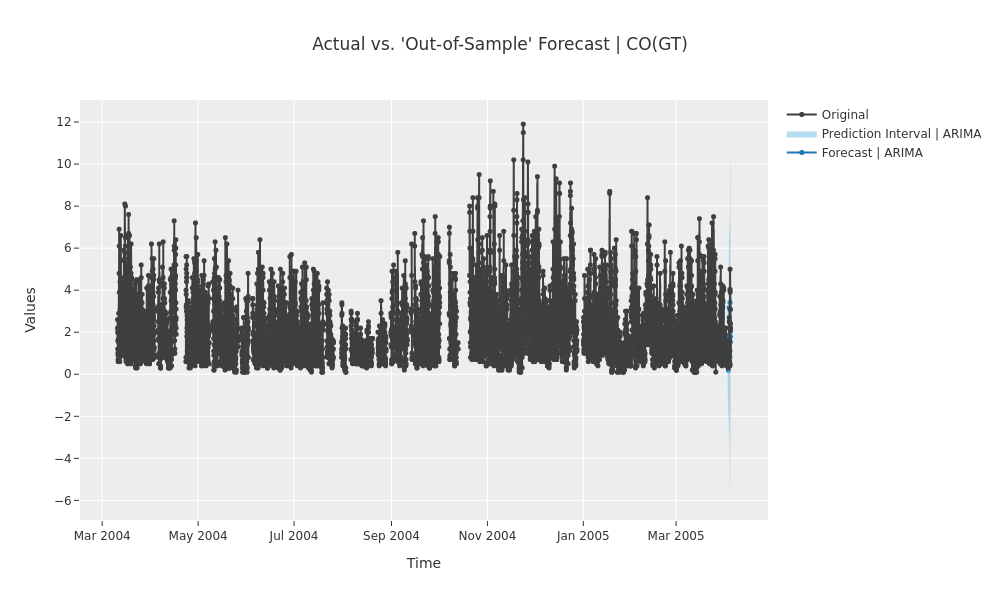

In [25]:
# Actual vs Prediction 시각화
exp_exo.plot_model(model_exo)

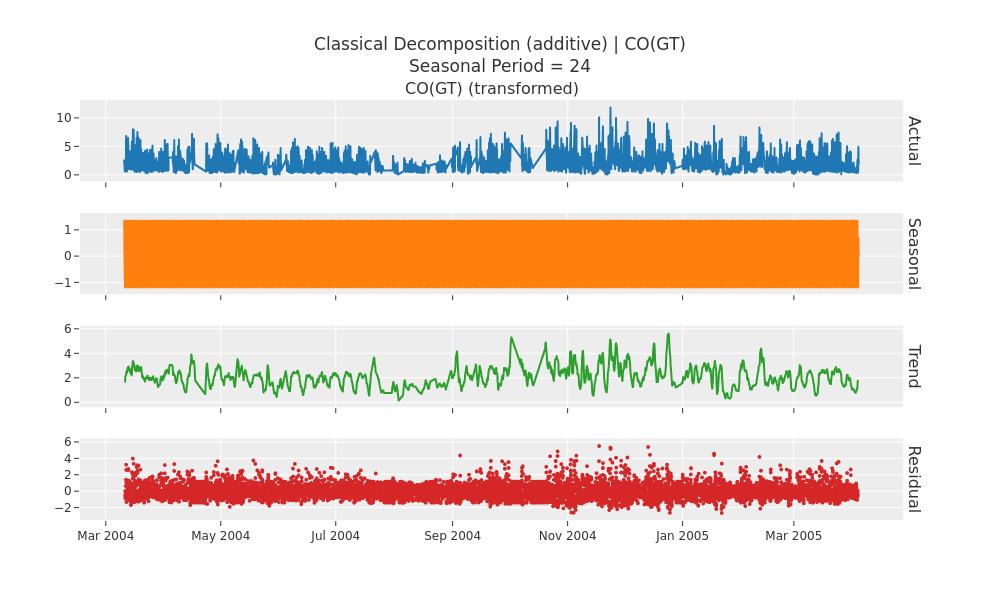

In [26]:
# 시계열 Decomposition - seasonal period
exp_exo.plot_model(plot="decomp", data_kwargs={"seasonal_period": 24})

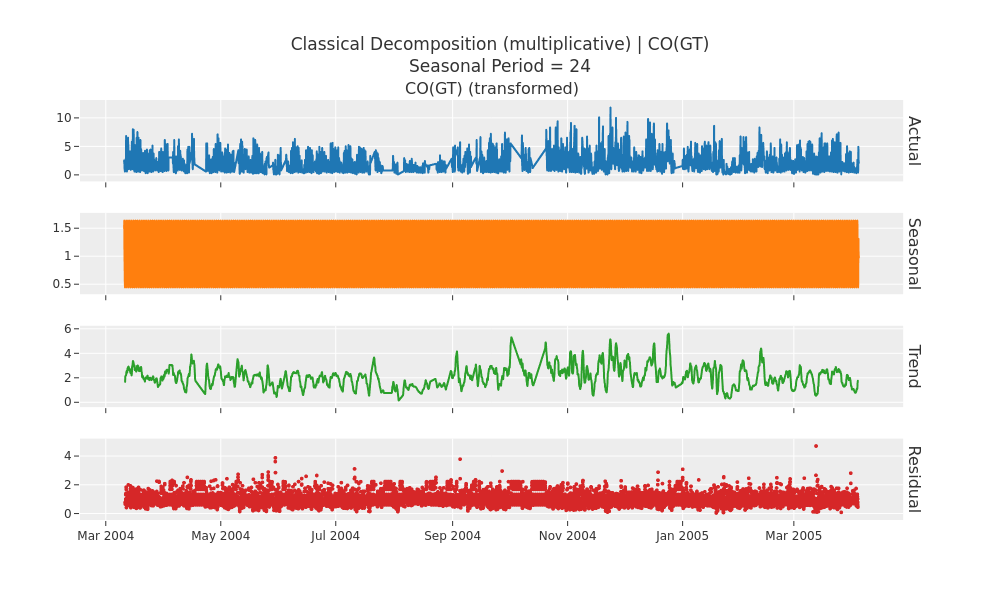

In [27]:
# 시계열 Decomposition
exp_exo.plot_model(plot="decomp", data_kwargs={"type": "multiplicative"})

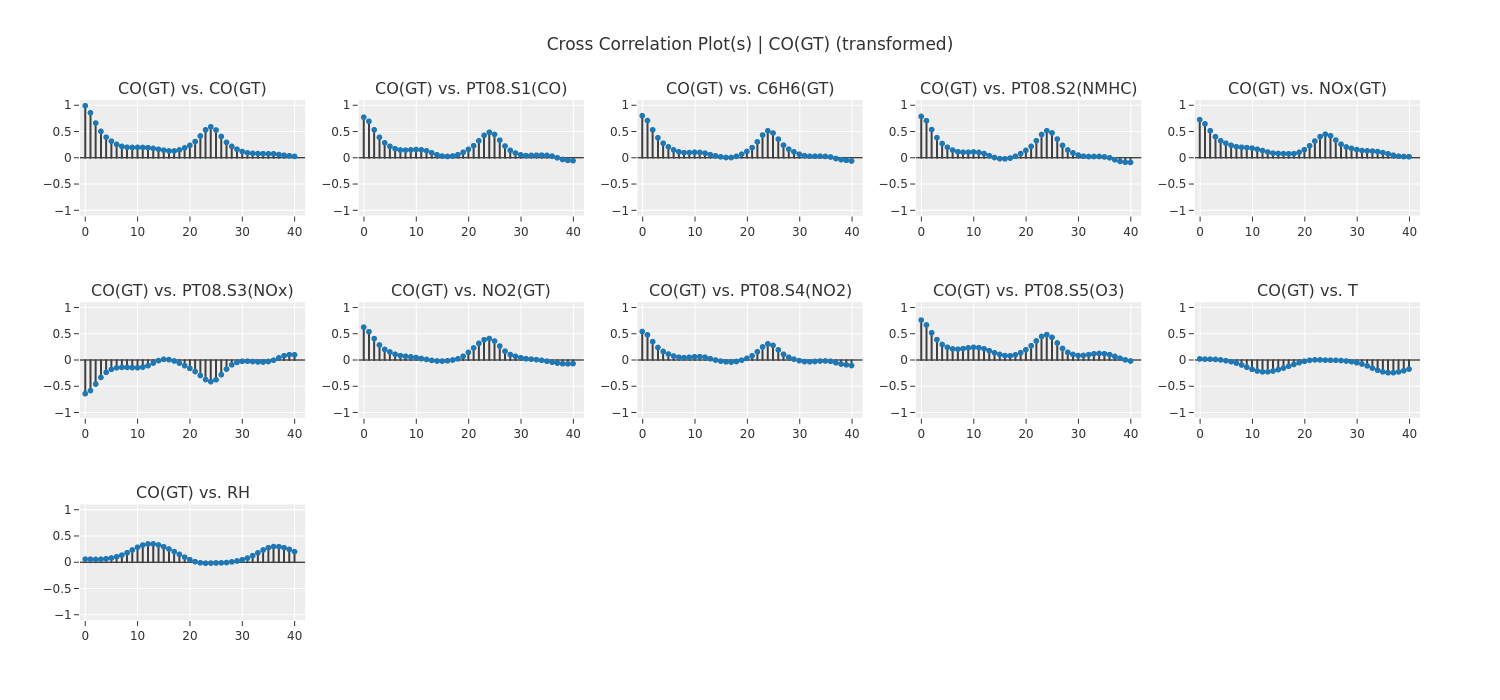

In [28]:
# Cross Correlation Plot 시각화
exp_exo.plot_model(
    plot="ccf",
    fig_kwargs={
        "width": 1500,
        "height": 700,
    },
)

In [29]:
# Finalize Model : 전체 데이터를 활용한 재학습
final_model_exo = exp_exo.finalize_model(model_exo)

In [30]:
# 예측을 위한 wrapper 함수
def safe_predict(exp, model):
    try:
        exp.predict_model(model)
    except ValueError as exception:
        print(exception)
        exo_vars = exp.exogenous_variables
        # 외생변수(Exogenous Variable) 가 설정이 안되었기 때문에 에러 발생
        print(
            f"{len(exo_vars)} exogenous variables (X) needed in order to make future predictions:\n{exo_vars}"
        )


safe_predict(exp_exo, final_model_exo)

Model was trained with exogenous variables but you have not passed any for predictions. Please pass exogenous variables to make predictions.
10 exogenous variables (X) needed in order to make future predictions:
['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH']


In [31]:
# 시계열 실험 생성
exp_slim = TSForecastingExperiment()

# 사용할 외생변수 & 타겟 정의
keep = [target, "datetime", "NOx(GT)", "PT08.S3(NOx)", "RH"]
data_slim = data[keep]

# setup
exp_slim.setup(
    data=data_slim,
    target=target,
    index="datetime",
    fh=48,
    numeric_imputation_target="drift",
    numeric_imputation_exogenous="linear",
    fig_kwargs=global_fig_settings,
    session_id=42,
)

,Description,Value
0,session_id,42
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(9357, 4)"
5,Transformed data shape,"(9357, 4)"
6,Transformed train set shape,"(9309, 4)"
7,Transformed test set shape,"(48, 4)"
8,Rows with missing values,25.8%
9,Fold Generator,ExpandingWindowSplitter


In [32]:
# 동일한 SARIMAX 모델을 생성
model_slim = exp_slim.create_model(
    "arima", order=(0, 1, 0), seasonal_order=(0, 1, 0, 24)
)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2005-03-27 14:00,0.2425,0.2653,0.2001,0.3286,0.1305,0.1299,0.8808
1,2005-03-29 14:00,0.3796,0.3707,0.3128,0.4587,0.3020,0.2191,0.8237
2,2005-03-31 14:00,0.3069,0.3331,0.2526,0.4117,0.2805,0.3921,0.2508
Mean,NaT,0.3096,0.3231,0.2552,0.3997,0.2377,0.2470,0.6518
SD,NaT,0.0560,0.0436,0.0460,0.0538,0.0763,0.1089,0.2845


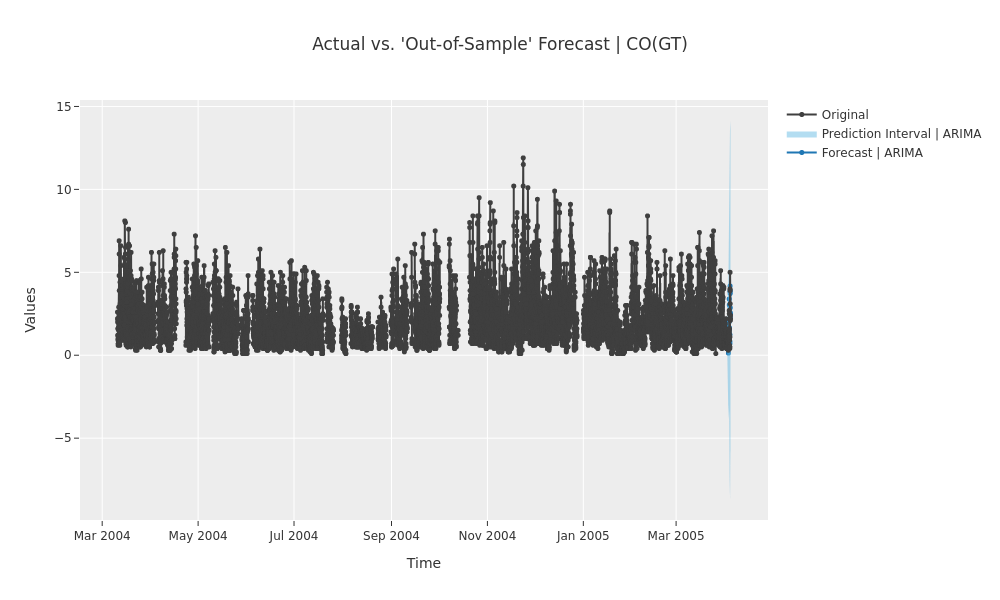

In [33]:
# 시각화
exp_slim.plot_model(
    model_slim,
)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [34]:
# 전체 데이터셋으로 재학습
final_slim_model = exp_slim.finalize_model(model_slim)

In [35]:
_ = exp_slim.save_model(final_slim_model, "final_slim_model")

Transformation Pipeline and Model Successfully Saved


In [36]:
safe_predict(exp_slim, final_slim_model)

Model was trained with exogenous variables but you have not passed any for predictions. Please pass exogenous variables to make predictions.
3 exogenous variables (X) needed in order to make future predictions:
['NOx(GT)', 'PT08.S3(NOx)', 'RH']


In [37]:
# 사용할 외생변수 정의(데모를 위해 3개만 추려냅니다)
exog_vars = ["NOx(GT)", "PT08.S3(NOx)", "RH"]
data = data[["datetime"] + exog_vars]
data.head()

,datetime,NOx(GT),PT08.S3(NOx),RH
0,2004-03-10 18:00:00,166.0,1056.0,48.9
1,2004-03-10 19:00:00,103.0,1174.0,47.7
2,2004-03-10 20:00:00,131.0,1140.0,54.0
3,2004-03-10 21:00:00,172.0,1092.0,60.0
4,2004-03-10 22:00:00,131.0,1205.0,59.6


: 

In [38]:
# STEP 1: 외생변수 각각에 대한 시계열 예측 수행
exog_exps = []
exog_models = []

for exog_var in exog_vars:
    # 외생변수에 대한 예측을 도출하기 위하여 시계열 실험 생성
    exog_exp = TSForecastingExperiment()
    # setup
    exog_exp.setup(
        data=data[["datetime", exog_var]],
        target=exog_var,
        index="datetime",
        fh=48,
        numeric_imputation_target="ffill",
        numeric_imputation_exogenous="ffill",
        fig_kwargs=global_fig_settings,
        session_id=42,
        verbose=False,
    )

    # 사용자는 미래 외생 변수를 모델링하는 방법을 사용자 정의할 수 있습니다.
    # 즉, 모델링 시간이 늘어나는 대신 더 나은 모델을 얻을 수 있는 추가 단계와 모델을 추가할 수 있습니다.
    best = exog_exp.compare_models(
        sort="mase",
        include=[
            "arima",
            "ets",
            "exp_smooth",
            "theta",
            "lightgbm_cds_dt",
        ],
        verbose=False,
    )
    final_exog_model = exog_exp.finalize_model(best)

    exog_exps.append(exog_exp)
    exog_models.append(final_exog_model)

: 

: 

In [ ]:
# STEP 2: 외생 변수에 대한 미래 예측 얻기
future_exog = [
    exog_exp.predict_model(exog_model)
    for exog_exp, exog_model in zip(exog_exps, exog_models)
]